In [1]:
import os
import sys

print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color
vID.init(cwd0)
import tools4PytChem as t4p

/home/romuald/ENSEIGNEMENT/0-JupyterNotebooks/PytChem


**Start at:** Friday 04 November 2022, 09:39:52  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/logoPytChem.svg" style="margin-left:auto; margin-right:auto"/></p>

# Dérivées et intégrales<br>**work in progress....**

## **1.** Introduction  



### **1.1.** Dérivées et intégrales ? Rafraîchissons-nous la mémoire avec un point de vue simple

#### **1.1.a.** Qu'est-ce qu'une dérivée d'une fonction ?

#### **1.1.b.** Qu'est-ce qu'une intégrale d'une fonction?

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## **2.** Dérivées

On va tout au long de ce paragraphe étudier trois fonctions simples :

$f_1(x)=x^2$

$f_2(x)=\sin(x)$

$f_3(x)=x^3+x^2-x$

In [8]:
def f1(x):
    return x**2

def f2(x):
    return np.sin(x)

def f3(x):
    return x**3+x**2-x

### **2.1.** Dérivée numérique

f1
6.0
0.0
-6.0
f2
-0.833049961066805
0.8414709848078965
-0.833049961066805
f3
33.0
0.0
21.0


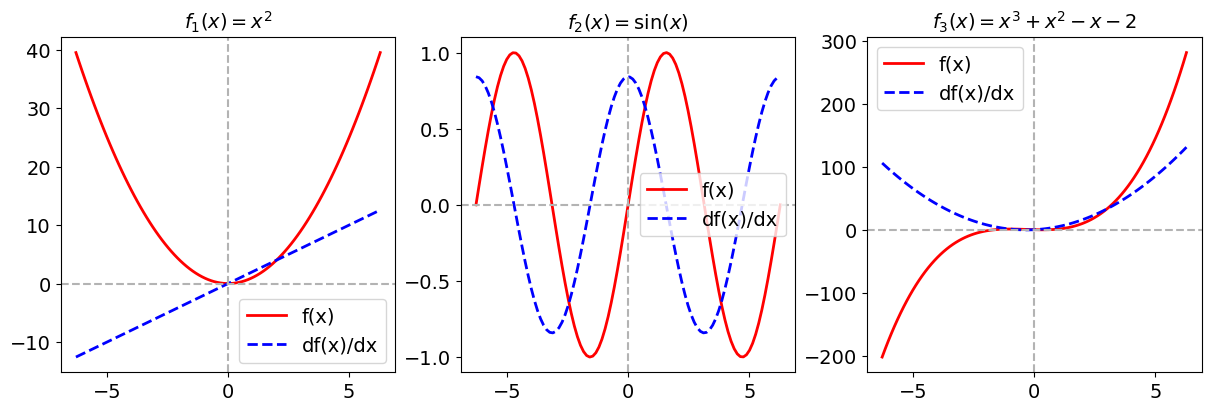

In [13]:
from scipy.misc import derivative as df

print(f"{color.RED}f1{color.OFF}")
print(df(f1,3,dx=1))
print(df(f1,0,dx=1))
print(df(f1,-3,dx=1))
print(f"{color.RED}f2{color.OFF}")
print(df(f2,3,dx=1))
print(df(f2,0,dx=1))
print(df(f2,-3,dx=1))
print(f"{color.RED}f3{color.OFF}")
print(df(f3,3,dx=1))
print(df(f3,0,dx=1))
print(df(f3,-3,dx=1))

xmin = -2*np.pi
xmax = 2*np.pi
npt = 100
# génération de npt points équirépartis entre xmin et xmax
x = np.linspace(xmin,xmax,npt)

plt.rcParams.update({'font.size': 14})
mosaic = [[f1,f2,f3]]
fig, graph = plt.subplot_mosaic(mosaic, constrained_layout=False,figsize=(12,4),sharex=False,sharey=False)

graph[f1].plot(x, f1(x),linewidth=2,color='red',label="f(x)")
graph[f1].plot(x,df(f1,x,dx=1),linewidth=2,color='blue',linestyle="--",label="df(x)/dx")
graph[f1].set_title("$f_1(x)=x^2$", fontsize=14, color="black")
graph[f1].axvline(x = 0, color = '0.7',linestyle='--')
graph[f1].axhline(y = 0, color = '0.7',linestyle='--')
graph[f1].legend()

graph[f2].plot(x, f2(x),linewidth=2,color='red',label="f(x)")
graph[f2].plot(x,df(f2,x,dx=1),linewidth=2,color='blue',linestyle="--",label="df(x)/dx")
graph[f2].set_title("$f_2(x)=\sin(x)$", fontsize=14, color="black")
graph[f2].axvline(x = 0, color = '0.7',linestyle='--')
graph[f2].axhline(y = 0, color = '0.7',linestyle='--')
graph[f2].legend()

graph[f3].plot(x, f3(x),linewidth=2,color='red',label="f(x)")
graph[f3].plot(x,df(f3,x,dx=1),linewidth=2,color='blue',linestyle="--",label="df(x)/dx")
graph[f3].set_title("$f_3(x)=x^3+x^2-x-2$", fontsize=14, color="black")
graph[f3].axvline(x = 0, color = '0.7',linestyle='--')
graph[f3].axhline(y = 0, color = '0.7',linestyle='--')
graph[f3].legend()


### **2.2.** Fonction dérivée (calcul symbolique)

Le symbole est la classe la plus importante de la bibliothèque `SymPy`. Comme mentionné précédemment, les calculs symboliques sont effectués avec des symboles. Les variables `SymPy` sont des objets de la classe `Symbol`.

In [14]:
import sympy as sym
from tools4PytChem import PrintLatexStyleSymPyEquation as ple

x = sym.Symbol('x')
df1dx = f1(x).diff(x)
df3dx = f3(x).diff(x)
def f2b(x):
    return sym.sin(x)
df2dx = f2b(x).diff(x)

print(f"{color.RED}f1{color.OFF}")
print("df1/dx = ",df1dx)

f1
df1/dx =  2*x


`df1dx` est un objet au format `SymPy`, qui permet de faire du calcul symbolique. Il n'est pas donc possible de directement utiliser cette fonction `SymPy` comme une fonction classique. La preuve avec l'exécution ci-dessous, qui va conduire à une erreur :


In [15]:
print(type(df1dx))
print(df1dx(3))

<class 'sympy.core.mul.Mul'>


TypeError: 'Mul' object is not callable

On peut quand même faire des applications numériques d'une fonction `SymPy`, grâce à la fonction `subs`. Par exemple : `df1dx.subs(x,2)` renvoie la valeur de `df1dx` après avoir substitué x par le nombre 2. C'est ce qu'on fait systématiquement ci-dessous :

In [16]:
print(f"{color.RED}f1{color.OFF}")
print("df1/dx = ",df1dx)
print("df1/dx for x=2 : ",df1dx.subs(x,2))
print(f"{color.RED}f2{color.OFF}")
print("df2/dx = ",df2dx)
print("df2/dx for x=2 : ",df2dx.subs(x,2))
print(f"{color.RED}f3{color.OFF}")
print("df3/dx = ",df3dx)
print("df3/dx for x=2 : ",df3dx.subs(x,2))

f1
df1/dx =  2*x
df1/dx for x=2 :  4
f2
df2/dx =  cos(x)
df2/dx for x=2 :  cos(2)
f3
df3/dx =  3*x**2 + 2*x - 1
df3/dx for x=2 :  15


Ce n'est pas toujours pratique d'utiliser la commande `subs`, en particulier si on veut tracer la fonction ou bien faire de nombreux calculs numériques. Heureusement, `SymPy` fournit une fonction, `lambdify`, qui crée une fonction classique à partir d'un objet symbolique.

`lambdify` transforme une expression symbolique `SymPy` en fonction qui peut être utilisée pour calculer des valeurs numériques très rapidement

(dans le monde python, cette fonction qui diffère d'une fonction définie par `def` est appelée fonction `lambda`)

In [17]:
from sympy import lambdify
df1num = lambdify(x, df1dx)
df2num = lambdify(x, df2dx)
df3num = lambdify(x, df3dx)
print(df1num)
print(df1num(x))
print(df1num(3))

<function _lambdifygenerated at 0x7fb3983ffac0>
2*x
6


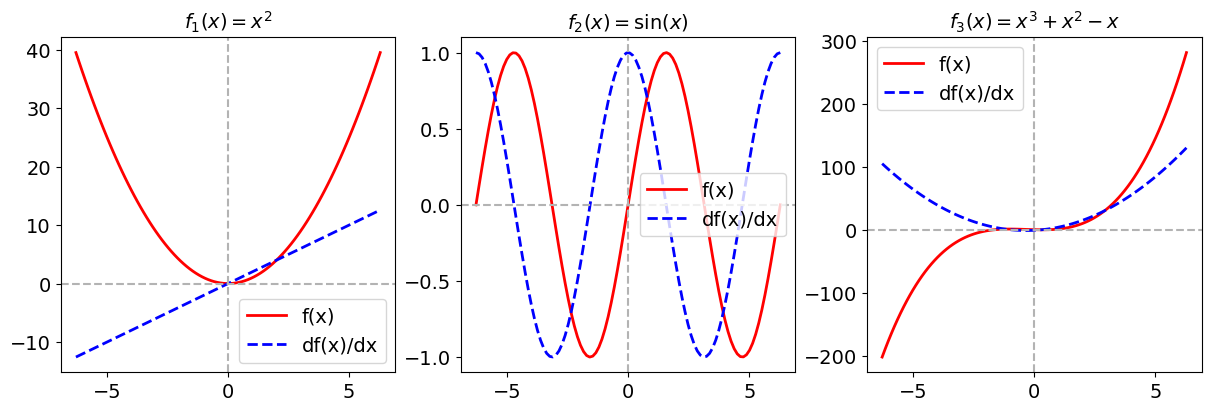

In [20]:
xmin = -2*np.pi
xmax = 2*np.pi
npt = 100
# génération de npt points équirépartis entre xmin et xmax
xx = np.linspace(xmin,xmax,npt)

plt.rcParams.update({'font.size': 14})
mosaic = [[f1,f2,f3]]
fig, graph = plt.subplot_mosaic(mosaic, constrained_layout=False,figsize=(12,4),sharex=False,sharey=False)

graph[f1].plot(xx, f1(xx),linewidth=2,color='red',label="f(x)")
graph[f1].plot(xx,df1num(xx),linewidth=2,color='blue',linestyle="--",label="df(x)/dx")
graph[f1].set_title("$f_1(x)=x^2$", fontsize=14, color="black")
graph[f1].axvline(x = 0, color = '0.7',linestyle='--')
graph[f1].axhline(y = 0, color = '0.7',linestyle='--')
graph[f1].legend()

graph[f2].plot(xx, f2(xx),linewidth=2,color='red',label="f(x)")
graph[f2].plot(xx,df2num(xx),linewidth=2,color='blue',linestyle="--",label="df(x)/dx")
graph[f2].set_title("$f_2(x)=\sin(x)$", fontsize=14, color="black")
graph[f2].axvline(x = 0, color = '0.7',linestyle='--')
graph[f2].axhline(y = 0, color = '0.7',linestyle='--')
graph[f2].legend()

graph[f3].plot(xx, f3(xx),linewidth=2,color='red',label="f(x)")
graph[f3].plot(xx,df3num(xx),linewidth=2,color='blue',linestyle="--",label="df(x)/dx")
graph[f3].set_title("$f_3(x)=x^3+x^2-x$", fontsize=14, color="black")
graph[f3].axvline(x = 0, color = '0.7',linestyle='--')
graph[f3].axhline(y = 0, color = '0.7',linestyle='--')
graph[f3].legend()

In [36]:
import sympy as sym
from tools4PytChem import PrintLatexStyleSymPyEquation as ple

def f4(a,n,x):
    return a*x**n

x = sym.Symbol('x')
a = sym.Symbol('a')
n = sym.Symbol('n')
df4dx1 = f4(a,n,x).diff(x)
df4dx2 = f4(a,n,x).diff(x,2)
print("dérivée première de f4 :", df4dx1)
ple(df4dx1)
ple(sym.simplify(df4dx1))
print()
print()
print("dérivée seconde de f4 :",df4dx2)
ple(df4dx2)
ple(sym.simplify(df4dx2))

dérivée première de f4 : a*n*x**n/x


<IPython.core.display.Math object>

<IPython.core.display.Math object>



dérivée seconde de f4 : a*n*x**n*(n - 1)/x**2


<IPython.core.display.Math object>

<IPython.core.display.Math object>

## **3.** Intégrales

In [22]:
def g1(x):
    return 2*x

def g2(x):
    return np.cos(x)

def g3(x):
    return 3*x**2+2*x-1

### **3.1.** Intégration numérique

In [23]:
import scipy.integrate as integrate

Ig1=integrate.quad(g1,-3,3)
Ig2=integrate.quad(g2,-np.pi,np.pi)
Ig3=integrate.quad(g3,-3,3)
print("intégration entre -3 et +3")
print("∫g1 dx = ",Ig1)
print("∫g2 dx = ",Ig2)
print("∫g3 dx = ",Ig3)

intégration entre -3 et +3
∫g1 dx =  (0.0, 1.9909512074731174e-13)
∫g2 dx =  (2.615901373506474e-16, 4.471737093238828e-14)
∫g3 dx =  (48.0, 5.596599307183144e-13)


### **3.2.** Fonction intégrale (calcul symbolique)

In [26]:
import sympy as sym
from tools4PytChem import PrintLatexStyleSymPyEquation as ple

x = sym.Symbol('x')
def g2b(x):
    return sym.cos(x)

Ig1 = g1(x).integrate(x)
Ig2 = g2b(x).integrate(x)
Ig3 = g3(x).integrate(x)
print("∫g1 dx = ",Ig1)
print("∫g2 dx = ",Ig2)
print("∫g3 dx = ",Ig3)

#\n = saut de ligne
print("\nintégration entre -a et +a")
Ig1 = g1(x).integrate((x,-3,3))
Ig2 = g2b(x).integrate((x,-np.pi,np.pi))
Ig3 = g3(x).integrate((x,-3,3))
print("∫g1 dx = ",Ig1)
print("∫g2 dx = ",Ig2)
print("∫g3 dx = ",Ig3)


∫g1 dx =  x**2
∫g2 dx =  sin(x)
∫g3 dx =  x**3 + x**2 - x

intégration entre -a et +a
∫g1 dx =  0
∫g2 dx =  2.44929359829471e-16
∫g3 dx =  48


## **4.** Exercices

### **4.1.** Calcul numérique

#### **1.** Pobabilité de présence radiale de l'électron 1s de H

La probabilité de présence radiale de l'électron 1s de l'atome d'hydrogène a pour expression :
$$\mathcal{P}_{1s}(r)=4r^{2}\exp\left(-2r\right)$$

où $r$ est exprimé en bohr
(1 bohr = 5.29177210903 $\times$ 10$^{-11}$ m)

**1.** Implémenter puis tracer cette fonction ainsi que sa dérivée première dP/dr entre 0 bohr et 6 bohr.

- Commenter la variation de $\mathcal{P}_{1s}(r)$
- Commenter la variation de $d\mathcal{P}_{1s}(r)/dr$

['Bohr magneton', 'Bohr magneton in Hz/T', 'Bohr magneton in K/T', 'Bohr magneton in eV/T', 'Bohr magneton in inverse meter per tesla', 'Bohr radius', 'deuteron mag. mom. to Bohr magneton ratio', 'electron mag. mom. to Bohr magneton ratio', 'helion mag. mom. to Bohr magneton ratio', 'muon mag. mom. to Bohr magneton ratio', 'neutron mag. mom. to Bohr magneton ratio', 'proton mag. mom. to Bohr magneton ratio', 'shielded helion mag. mom. to Bohr magneton ratio', 'shielded proton mag. mom. to Bohr magneton ratio', 'triton mag. mom. to Bohr magneton ratio']
rayon de Bohr :  (5.29177210903e-11, 'm', 8e-21)


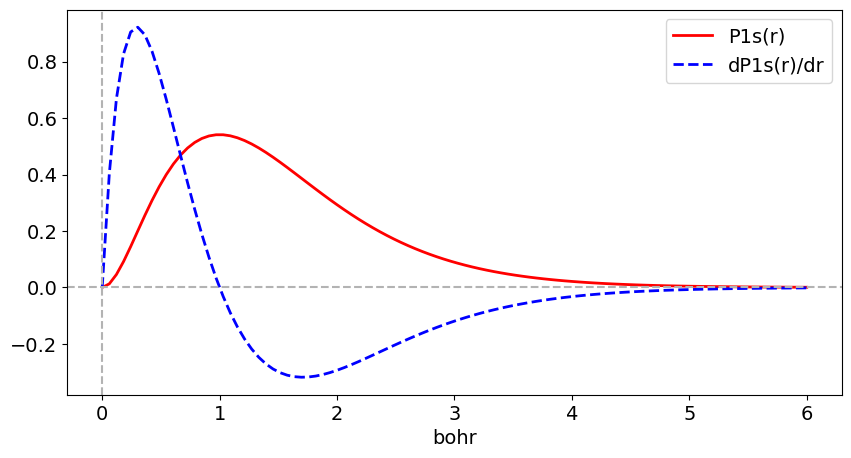

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative as df
import scipy.integrate as integrate
import scipy.constants as sc

print(sc.find("bohr"))
print("rayon de Bohr : ",sc.physical_constants["Bohr radius"])
a0 = sc.value("Bohr radius")

def P1s(r):
    return 4*r**2*np.exp(-2*r)

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 14})

r = np.linspace(0.,6.,100) # r est ici implicitement exprimé en angström
plt.plot(r, P1s(r),linewidth=2,color='red',label="P1s(r)")
plt.plot(r,df(P1s,r,dx=1e-12),linewidth=2,color='blue',linestyle="--",label="dP1s(r)/dr")
plt.axvline(x = 0, color = '0.7',linestyle='--')
plt.axhline(y = 0, color = '0.7',linestyle='--')
plt.xlabel("bohr")
plt.legend()

**2.** Calculer l'intégrale de la probabilité de présence radiale entre 0 et +$\infty$. Commenter.

NB. On a besoin ici d'une représentation numérique de l'infini. La bibliothèque `numpy` fournit pour cela `np.inf`  

In [30]:
import scipy.integrate as integrate

print(integrate.quad(P1s,0,np.inf))

(0.9999999999999999, 1.3633026582969806e-10)


**3.** Dans le cadre de la physique quantique, il est facile de montrer que la valeur moyenne $\left\langle r\right\rangle$ de la position de l'électron est donnée par l'intégrale :
$$\left\langle r\right\rangle =\int_{0}^{\infty}r\mathcal{P}_{1s}(r)dr$$

- Calculer $\left\langle r\right\rangle$.
- Reporter la valeur trouvée sur le graphe précédent en traçant une ligne verticale. La valeur obtenue vous semble-t-elle qualitativement correcte ?

In [31]:
def frmoyen(r):
    return r*P1s(r)
print(integrate.quad(frmoyen,0,np.inf))

(1.5, 1.4042402494912527e-09)


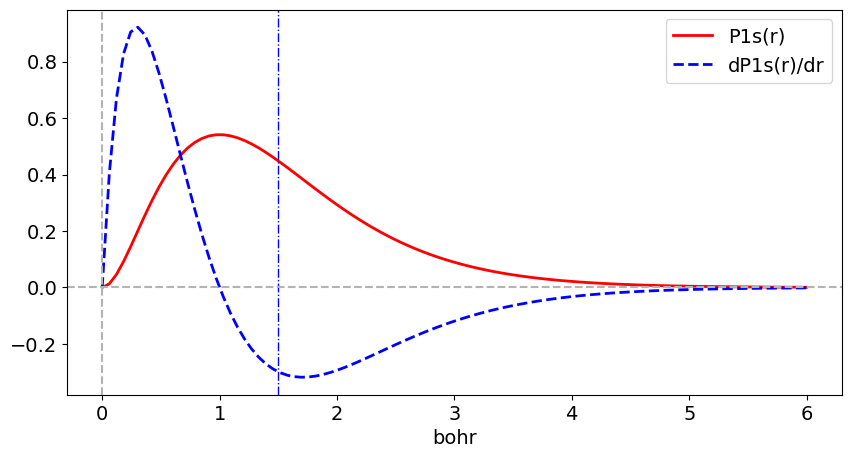

In [33]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 14})

r = np.linspace(0.,6.,100) # r est ici implicitement exprimé en angström
plt.plot(r, P1s(r),linewidth=2,color='red',label="P1s(r)")
plt.plot(r,df(P1s,r,dx=1e-12),linewidth=2,color='blue',linestyle="--",label="dP1s(r)/dr")
plt.axvline(x = 0, color = '0.7',linestyle='--')
plt.axvline(x = 1.5, color = 'blue',linestyle='-.',linewidth=1)
plt.axhline(y = 0, color = '0.7',linestyle='--')
plt.xlabel("bohr")
plt.legend()

### **4.2.** Calcul symbolique
#### **1.** Dérivées identiques
Donner l'expression de la dérivée en fonction de x de
- $h_1(x)=2x^3 -x + 1$
- $h_2(x)=2x^3 -x + 7$

Comparer les deux dérivées.

Donner, sans calcul, l'expression de l'intégrale de $6x^2-1$



In [35]:
import sympy as sym
from tools4PytChem import PrintLatexStyleSymPyEquation as ple

def h1(x):
    return 2*x**3-x+1
def h2(x):
    return 2*x**3-x+7

x = sym.Symbol('x')
dh1dx = h1(x).diff(x)
dh2dx = h2(x).diff(x)
print("dh1/dx",dh1dx)
ple(dh1dx)
print()
print("dh2/dx = ",dh2dx)
ple(dh2dx)

dh1/dx 6*x**2 - 1


<IPython.core.display.Math object>


dh2/dx =  6*x**2 - 1


<IPython.core.display.Math object>

#### **2.** Dérivation d'une loi de cinétique chimique

**2a.** Donner l'expression de la dérivée en fonction de t de :
$$[\mathrm{B}]_t=\frac{k_{1}}{k_{2}-k_{1}}a_{0}\left(\mathrm{e}^{-k_{1}t}-\mathrm{e}^{-k_{2}t}\right)$$
où $k_1$, $k_2$ et $a_0$ sont des constantes<br>
($a_0$ ici est une concentration, à ne pas confondre donc avec le rayon de Bohr, également noté $a_0$)

In [43]:
import sympy as sym
from tools4PytChem import PrintLatexStyleSymPyEquation as ple

def b(k1,k2,a0,t):
    return (k1/(k2-k1))*a0*(sym.exp(-k1*t) - sym.exp(-k2*t))

t = sym.Symbol('t')
k1 = sym.Symbol('k1')
k2 = sym.Symbol('k2')
a0 = sym.Symbol('a0')

dbdt = b(k1,k2,a0,t).diff(t)
print("db/dt = ",dbdt)
ple(dbdt)

db/dt =  a0*k1*(-k1*exp(-k1*t) + k2*exp(-k2*t))/(-k1 + k2)


<IPython.core.display.Math object>

**2b.** On va poser $k_1$ = 10, $k_2$ = 1, $a_0$ = 0,1.

Tracer $[\mathrm{B}]_t$ et $[\mathrm{B}]_t'=d[\mathrm{B}]_t/dt$ entre 0 et 5 et avec [-0.1 : 0.2] comme intervalle des ordonnées.

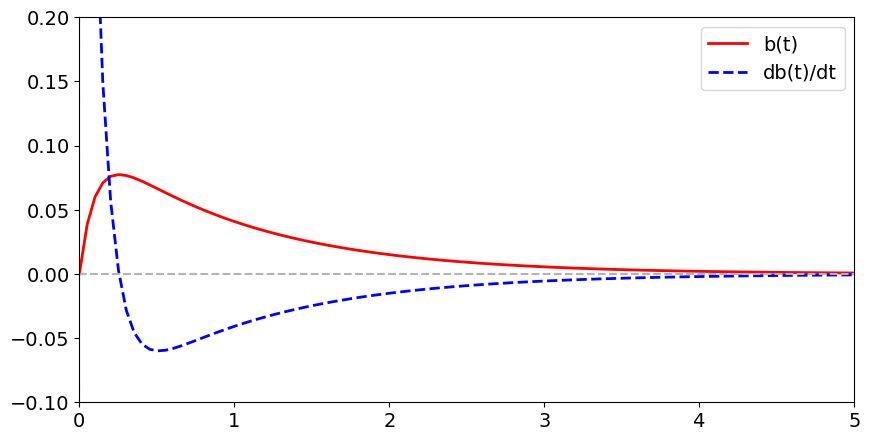

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify

#initialisation des variables. Ne pas écraser les variables symboliques k1, k2 et a0
# -> on utilise les variables k1_, k2_ et a0_ pour leur équivalent numérique
# convention perso. On aurait très bien pu les appeler titi, tata et toto
k1_ = 10
k2_ = 1
a0_ = 0.1

bnum = lambdify([k1,k2,a0,t], b(k1,k2,a0,t))
dbnum = lambdify([k1,k2,a0,t], dbdt)
xx = np.linspace(0.,5.,100)
plt.plot(xx, bnum(k1_,k2_,a0_,xx),linewidth=2,color='red',label="b(t)")
plt.plot(xx,dbnum(k1_,k2_,a0_,xx),linewidth=2,color='blue',linestyle="--",label="db(t)/dt")
plt.axvline(x = 0, color = '0.7',linestyle='--')
plt.axhline(y = 0, color = '0.7',linestyle='--')
plt.xlim(0,5)
plt.ylim(-0.1,0.2)
plt.legend()

#### **3.** Résolution d'une égalité
L'objectif est de trouver l'expression de $t$ pour laquelle la dérivée première s'annule, ce qui va nous donner le temps pour lequel la [B] est maximale.

On va encore utiliser `SymPy` pour cela.

In [40]:
tmax = sym.solveset(sym.Eq(dbdt, 0), t)
ple(tmax)
# résultat renvoyé dans un dictionnaire. On va le convertir en liste
# afin de récupérer le premier élement de la liste pour pouvoir travailler avec
tmax1 = list(tmax)[0]
ple(tmax1)
# comme précédemment, il faut utiliser `lambdify` pour transformer la fonction analytique en une fonction python classique
tmaxnum = lambdify([k1,k2],tmax1)
print(f"k1 = {k1_} et k2 = {k2_} --> tmax = {tmaxnum(k1_,k2_)}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

k1 = 10 et k2 = 1 --> tmax = 0.2558427881104495


In [41]:
vID.end(cwd0)

**End at:** Friday 04 November 2022, 10:08:14  
**Duration:** 00:28:22 369ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>